### UNDERSTANDING THE PROBLEM STATEMENT 

Google and Aravind Eye Hospital work: https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

# IMPORT LIBRARIES & DATASETS

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
# list all the files and directories
os.listdir('./train')

['Mild', 'Moderate', 'Proliferate_DR', 'Severe', 'No_DR']

In [3]:
os.listdir(os.path.join('train', 'Mild'))

['2d7666b8884f.png',
 '50840c36f0b4.png',
 '30cab14951ac.png',
 'a8582e346df0.png',
 'cab3dfa7962d.png',
 '35d6c4c50072.png',
 '67f5d89da548.png',
 '6b07971c3bf6.png',
 '7116128c65ab.png',
 'e38f3a65b02b.png',
 'd85588ff2ebd.png',
 'a19ecd0a706e.png',
 '49c5e7f6b8d2.png',
 '2f2e1949ad56.png',
 '35aa7f5c2ec0.png',
 '55eac26bd383.png',
 'af133a85ea0c.png',
 '80a02014b418.png',
 '384631079d1e.png',
 'e25ccfe38e44.png',
 '6ea07d19b4ce.png',
 '8273fdb4405e.png',
 'ead23cc922ed.png',
 '1e8a1fdee5b9.png',
 'c102db7634d8.png',
 '1b329a127307.png',
 '0f495d87656a.png',
 '58184d6fd087.png',
 '25e9fd872182.png',
 'c4a8f2fcf6e8.png',
 'ee78ce914066.png',
 'e9ff9352ccb3.png',
 'cb2f3c5d71a7.png',
 '5090917a2676.png',
 '79ce83c07588.png',
 'dbd062558b81.png',
 '5671eb95512b.png',
 '00cb6555d108.png',
 '96a9706b8534.png',
 'ea15a290eb96.png',
 '36677b70b1ef.png',
 'eba3acc42197.png',
 'f481f76a6b75.png',
 'f6f7dba7104d.png',
 '821789e9053f.png',
 'a75bab2463d4.png',
 '6028a575dc27.png',
 'a47432cd41e

## Checking the number of images in the dataset


In [4]:
import os
import glob

train = []
label = []

# list of files with the specified pattern
for class_dir in glob.glob('./train/*'):
    class_name = os.path.basename(class_dir)
    # Only add files with image extensions
    for img_file in glob.glob(os.path.join(class_dir, '*.[pjJ][npP][gG]')):
        train.append(img_file)
        label.append(class_name)

print('Number of train images are : {} \n'.format(len(train)))


Number of train images are : 3662 



In [6]:
train

['./train/Mild/2d7666b8884f.png',
 './train/Mild/50840c36f0b4.png',
 './train/Mild/30cab14951ac.png',
 './train/Mild/a8582e346df0.png',
 './train/Mild/cab3dfa7962d.png',
 './train/Mild/35d6c4c50072.png',
 './train/Mild/67f5d89da548.png',
 './train/Mild/6b07971c3bf6.png',
 './train/Mild/7116128c65ab.png',
 './train/Mild/e38f3a65b02b.png',
 './train/Mild/d85588ff2ebd.png',
 './train/Mild/a19ecd0a706e.png',
 './train/Mild/49c5e7f6b8d2.png',
 './train/Mild/2f2e1949ad56.png',
 './train/Mild/35aa7f5c2ec0.png',
 './train/Mild/55eac26bd383.png',
 './train/Mild/af133a85ea0c.png',
 './train/Mild/80a02014b418.png',
 './train/Mild/384631079d1e.png',
 './train/Mild/e25ccfe38e44.png',
 './train/Mild/6ea07d19b4ce.png',
 './train/Mild/8273fdb4405e.png',
 './train/Mild/ead23cc922ed.png',
 './train/Mild/1e8a1fdee5b9.png',
 './train/Mild/c102db7634d8.png',
 './train/Mild/1b329a127307.png',
 './train/Mild/0f495d87656a.png',
 './train/Mild/58184d6fd087.png',
 './train/Mild/25e9fd872182.png',
 './train/Mild

In [5]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

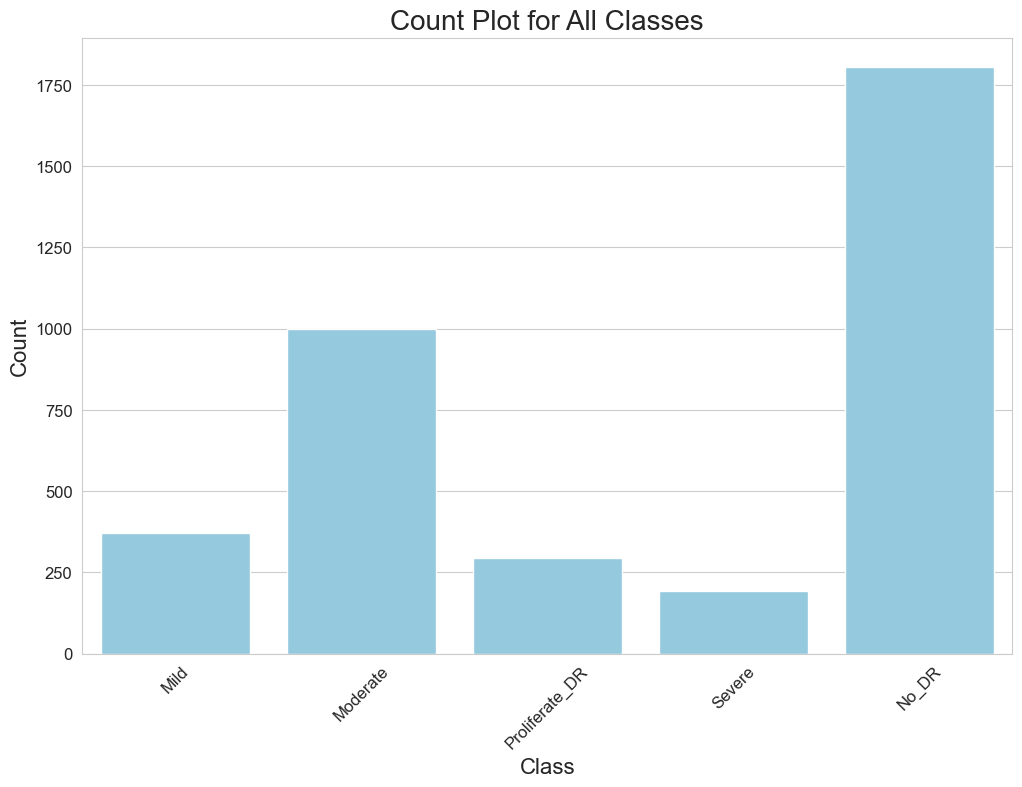

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

label_series = pd.Series(label)

color = "skyblue"

plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
ax = sns.countplot(x=label_series, color=color)


plt.title('Count Plot for All Classes', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# DATA EXPLORATION AND DATA VISUALIZATION

### Visualizing 5 images for each class in the dataset

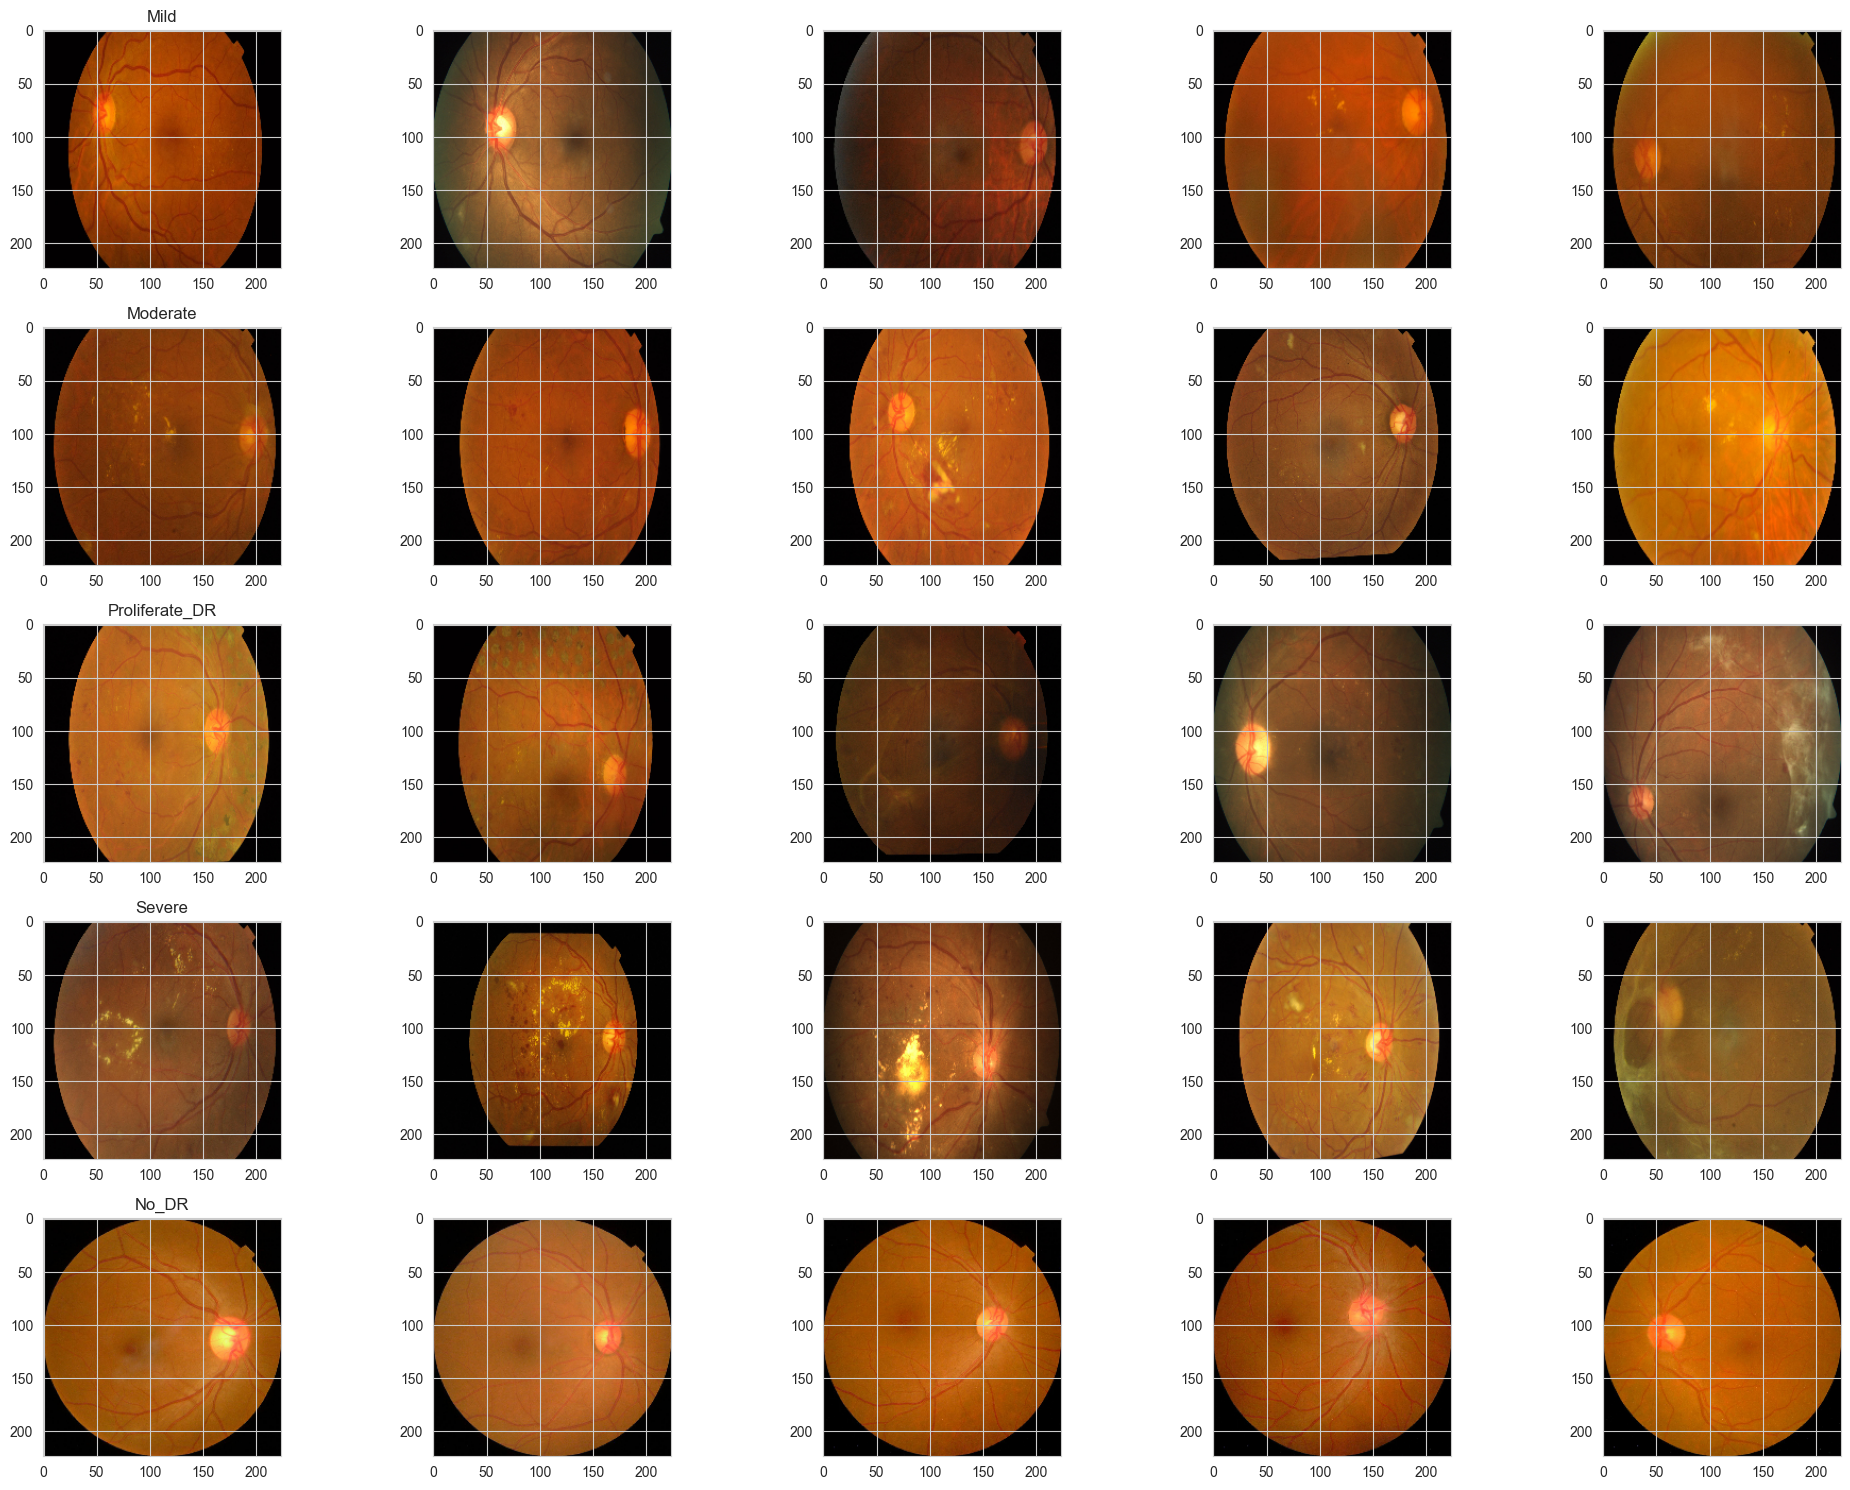

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Number of samples to display per class
samples_per_class = 5

train_path = './train'

#list of class directories
class_dirs = os.listdir(train_path)
num_classes = len(class_dirs)

fig, axs = plt.subplots(num_classes, samples_per_class, figsize=(20, num_classes * 3))

# Loop through each class directory
for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(train_path, class_dir)
    # list of images in the class directory
    image_files = os.listdir(class_path)

    for j in range(samples_per_class):
        img_path = os.path.join(class_path, image_files[j])
        img = Image.open(img_path)

        # Plot the image in the corresponding subplot
        axs[i, j].imshow(img)
        axs[i, j].axis('on')

        # Adding a title for the first image in each row for each class
        if j == 0:
            axs[i, j].set_title(class_dir, fontsize=12)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()


### Checking the number of img in each class in the dataset


In [ ]:
train_path = './train'

classes = os.listdir(train_path)

# Count the number of images in each class
num_images = [len(os.listdir(os.path.join(train_path, class_dir))) for class_dir in classes]

# Calculate the total number of images
total_images = sum(num_images)

# Number of images and percentages for each class
for class_name, count in zip(classes, num_images):
    percentage = (count / total_images) * 100
    print(f'Number of images in "{class_name}" = {count} ({percentage:.2f}%)')


print(f'\nTotal images: {total_images}')


In [ ]:
# Creating a pie chart showing the percentage of samples per class
colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=classes, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percentage of Samples Per Class', fontsize=18)
plt.axis('equal')

plt.show()

In [15]:
import pandas as pd

retina_df = pd.DataFrame({
    'Image': train,   
    'Labels': label  
})


retina_df


,Image,Labels
0,./train/Mild/2d7666b8884f.png,Mild
1,./train/Mild/50840c36f0b4.png,Mild
2,./train/Mild/30cab14951ac.png,Mild
3,./train/Mild/a8582e346df0.png,Mild
4,./train/Mild/cab3dfa7962d.png,Mild
...,...,...
3657,./train/No_DR/6b30767595d8.png,No_DR
3658,./train/No_DR/2b4c7b5f1f1e.png,No_DR
3659,./train/No_DR/ab78a66dee6a.png,No_DR
3660,./train/No_DR/79ade634c633.png,No_DR


# DATA AUGMENTATION AND CREATE DATA GENERATOR

In [16]:
# # To avoid Avoid Bias >>> Shuffling the data and spliting it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

## Preparing image data for training and testing a machine learning model.
We used (ImageDataGenerator) to prepare our images for training and testing the model. 
#### For training, it normalizes the image pixels (makes their values between 0 and 1) and adds some random changes like tilting the images a little. This helps the model learn better and not get too fixed on specific details. It also splits the training data into two parts: one for training and one for checking how well the training is going (validation). 
#### For testing, it only normalizes the images without changing them, so we can see how well the model performs on clean, untouched data.

In [17]:
# Defining data generators for training and testing datasets

# The training data generator normalizes the pixel values (rescale), applies random shearing (shear_range) 
# to augment the data, and reserves 15% of the data for validation (validation_split).

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# The testing data generator only normalizes the pixel values (rescale) without any augmentations.

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


### Another image augmentation strategies to the training data.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [20]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

### As we add more layers to a network, it becomes harder to train because so there will be two potentional problems: 
##### Vanishing Gradients: The information that helps the network learn (gradients) gets smaller as it moves back through the layers, making the earlier layers stop learning.
##### Hard to Optimize: A deep network has to figure out very complicated changes, which can make training slow and less effective.

### Solution: Residual blocks are like giving the network a shortcut to skip over layers. This makes it easier to train and allows the network to learn better, even when it’s very deep. 

# BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [27]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPool2D
from tensorflow.keras.initializers import glorot_uniform

def convolutional_block(X, filters, stage):
    """Convolutional block for the ResNet architecture."""
    X_copy = X
    f1, f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D((2, 2))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_c')(X)

    # Short Path
    X_copy = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2, 2))(X_copy)
    X_copy = BatchNormalization(axis=3, name=f'bn_{stage}_conv_copy')(X_copy)

    # Add and Activate
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

def identity_block(X, filters, stage, block):
    """Identity block for the ResNet architecture."""
    X_copy = X
    f1, f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_{block}_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_identity_{block}_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_identity_{block}_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_c')(X)

    # Add and Activate
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

def res_block(X, filters, stage):
    """ResNet block consisting of a convolutional block followed by identity blocks."""
    # Convolutional Block
    X = convolutional_block(X, filters, stage)

    # Identity Blocks
    X = identity_block(X, filters, stage, block=1)
    X = identity_block(X, filters, stage, block=2)

    return X

In [30]:
def build_resnet(input_shape):
    """Builds a ResNet model using modular res_block."""
    # Input tensor shape
    X_input = Input(input_shape)

    # Zero-padding
    X = ZeroPadding2D((3, 3))(X_input)

    # 1 - stage
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # 2- stage
    X = res_block(X, filters=[64, 64, 256], stage=2)

    # 3- stage
    X = res_block(X, filters=[128, 128, 512], stage=3)

    # 4- stage
    X = res_block(X, filters=[256, 256, 1024], stage=4)

    # 5- stage (commented out in original code, uncomment if needed)
    # X = res_block(X, filters=[512, 512, 2048], stage=5)

    # Average Pooling
    X = AveragePooling2D((2, 2), name='Average_Pooling')(X)

    # Final layer
    X = Flatten()(X)
    X = Dense(5, activation='softmax', name='Dense_final', kernel_initializer=glorot_uniform(seed=0))(X)

    # Create the model
    model = Model(inputs=X_input, outputs=X, name='ResNet18')

    return model

# Defining input shape
input_shape = (256, 256, 3)

# Building model
model = build_resnet(input_shape)

model.summary()


Model: "ResNet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d_5… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_131      │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 63, 63,    │          0 │ activation_131[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d_33… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_34    │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_34… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_132      │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_132[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_133      │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d_33… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_133[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_35    │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 4,987,525 (19.03 MB)

 Trainable params: 4,967,685 (18.95 MB)

 Non-trainable params: 19,840 (77.50 KB)

#### Now we have the roadmap of your model. 

# COMPILING AND TRAINING DEEP LEARNING MODEL

### Now we can prepare the model for training. 

In [32]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [35]:
# Stop training if validation loss does not improve for 15 consecutive epochs
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Save the model weights only when validation loss improves
checkpointer = ModelCheckpoint(filepath='weights.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5430 - loss: 3.0843
Epoch 1: val_loss improved from inf to 1.76163, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5441 - loss: 3.0668 - val_accuracy: 0.2644 - val_loss: 1.7616
Epoch 2/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:47 1s/step - accuracy: 0.7188 - loss: 0.7059

2024-11-25 18:28:08.195508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.76163 to 1.69345, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7188 - loss: 0.7059 - val_accuracy: 0.1739 - val_loss: 1.6934
Epoch 3/10


2024-11-25 18:28:08.413127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7007 - loss: 0.8637
Epoch 3: val_loss did not improve from 1.69345
77/77 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.7007 - loss: 0.8635 - val_accuracy: 0.2692 - val_loss: 1.7053
Epoch 4/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:47 1s/step - accuracy: 0.8438 - loss: 0.5834

2024-11-25 18:30:08.055471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss did not improve from 1.69345
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.5834 - val_accuracy: 0.1739 - val_loss: 1.8721
Epoch 5/10


2024-11-25 18:30:08.261788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7363 - loss: 0.7243
Epoch 5: val_loss did not improve from 1.69345
77/77 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7361 - loss: 0.7246 - val_accuracy: 0.2620 - val_loss: 1.7897
Epoch 6/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:08 2s/step - accuracy: 0.7188 - loss: 0.7821

2024-11-25 18:32:24.157854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss improved from 1.69345 to 1.59888, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7188 - loss: 0.7821 - val_accuracy: 0.3043 - val_loss: 1.5989
Epoch 7/10


2024-11-25 18:32:24.407367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7347 - loss: 0.7177
Epoch 7: val_loss improved from 1.59888 to 1.56931, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7347 - loss: 0.7180 - val_accuracy: 0.2885 - val_loss: 1.5693
Epoch 8/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:02 2s/step - accuracy: 0.7500 - loss: 0.6909

2024-11-25 18:34:45.737833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 1.56931
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7500 - loss: 0.6909 - val_accuracy: 0.1304 - val_loss: 1.8605
Epoch 9/10


2024-11-25 18:34:46.017804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7358 - loss: 0.6992
Epoch 9: val_loss improved from 1.56931 to 1.37784, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7359 - loss: 0.6994 - val_accuracy: 0.4207 - val_loss: 1.3778
Epoch 10/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.8125 - loss: 0.4152

2024-11-25 18:37:13.081410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss improved from 1.37784 to 1.04896, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8125 - loss: 0.4152 - val_accuracy: 0.6522 - val_loss: 1.0490


2024-11-25 18:37:13.340992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


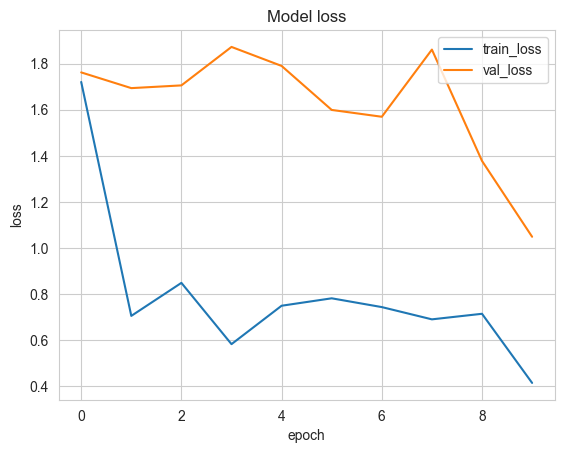

In [36]:
# Train for 10 epochs instead of 1
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()
